In [71]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
cust=pd.read_csv("market_data.csv", index_col="Unnamed: 0")

In [73]:
cust.head()

,ID,Income,Recency,NumWebVisitsMonth,Complain,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,...,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Expenses,NumPurchases,AcceptedCmp,Childrenhome,Age,clusterid
0,5524,58138.0,58,7,0,1,0,0,1,0,...,1,0,0,0,1617,25,0,0,66,2
1,2174,46344.0,38,5,0,0,0,0,1,0,...,1,0,0,0,27,6,0,2,69,2
2,4141,71613.0,26,4,0,0,0,0,1,0,...,0,1,0,0,776,21,0,0,58,2
3,6182,26646.0,26,6,0,0,0,0,1,0,...,0,1,0,0,53,8,0,1,39,2
4,5324,58293.0,94,5,0,0,0,0,0,0,...,0,0,0,0,422,19,0,1,42,2


In [74]:
cust.shape

(1898, 25)

In [75]:
cust["clusterid"].value_counts()

2    743
0    530
1    372
3    253
Name: clusterid, dtype: int64

In [76]:
scaler=StandardScaler()

In [77]:
scaler

StandardScaler()

In [78]:
cust.columns

Index(['ID', 'Income', 'Recency', 'NumWebVisitsMonth', 'Complain', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Expenses', 'NumPurchases', 'AcceptedCmp',
       'Childrenhome', 'Age', 'clusterid'],
      dtype='object')

In [79]:
continuous_columns=['Income', 'Recency','Expenses','NumPurchases']

In [80]:
len(cust["Age"].value_counts())

55

In [81]:
# dropping "Marital_Status_Absurd" as it has single value only
cust.drop("Marital_Status_Absurd", axis=1, inplace=True)

In [82]:
# dropping "Marital_Status_Alone" as it has single value only
cust.drop("Marital_Status_Alone", axis=1, inplace=True)

In [83]:
# dropping "Marital_Status_YOLO" as it has single value only
cust.drop("Marital_Status_YOLO", axis=1, inplace=True)

In [84]:
cust

,ID,Income,Recency,NumWebVisitsMonth,Complain,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Expenses,NumPurchases,AcceptedCmp,Childrenhome,Age,clusterid
0,5524,58138.0,58,7,0,1,0,0,1,0,...,0,1,0,0,1617,25,0,0,66,2
1,2174,46344.0,38,5,0,0,0,0,1,0,...,0,1,0,0,27,6,0,2,69,2
2,4141,71613.0,26,4,0,0,0,0,1,0,...,0,0,1,0,776,21,0,0,58,2
3,6182,26646.0,26,6,0,0,0,0,1,0,...,0,0,1,0,53,8,0,1,39,2
4,5324,58293.0,94,5,0,0,0,0,0,0,...,1,0,0,0,422,19,0,1,42,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,34421.0,81,7,0,0,0,0,1,0,...,1,0,0,0,30,4,0,1,49,0
2235,10870,61223.0,46,5,0,0,0,0,1,0,...,1,0,0,0,1341,18,0,1,56,0
2237,7270,56981.0,91,6,0,0,0,0,1,0,...,0,0,0,0,1241,19,1,0,42,0
2238,8235,69245.0,8,3,0,0,0,0,0,1,...,0,0,1,0,843,23,0,1,67,2


In [85]:
x=cust.drop("clusterid",axis=1)
y=cust["clusterid"]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [88]:
rf_classifier = RandomForestClassifier(n_estimators=110, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [89]:

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


Barplot for column: Income


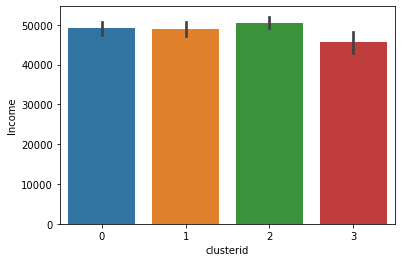

Barplot for column: Recency


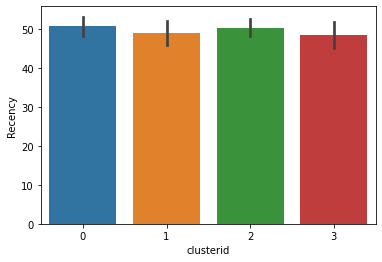

Barplot for column: Expenses


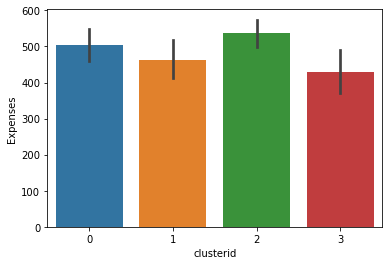

Barplot for column: NumPurchases


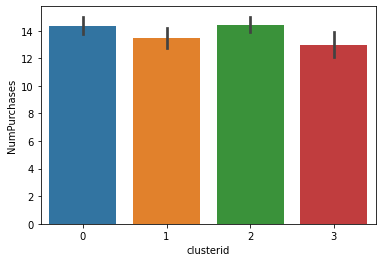

In [92]:
for i in continuous_columns:
    print(f"Barplot for column: {i}")
    sns.barplot(x="clusterid", y=i, data=cust)
    plt.show()

In [93]:
cust.columns

Index(['ID', 'Income', 'Recency', 'NumWebVisitsMonth', 'Complain', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow', 'Expenses',
       'NumPurchases', 'AcceptedCmp', 'Childrenhome', 'Age', 'clusterid'],
      dtype='object')

In [95]:
cat_column=cust.columns

In [97]:
continuous_columns

['Income', 'Recency', 'Expenses', 'NumPurchases']

In [102]:
cat_column=list(cat_column)

In [106]:
for i in continuous_columns:
    cat_column.remove(i)

In [109]:
cat_column.remove("ID")

Countplot for column: NumWebVisitsMonth


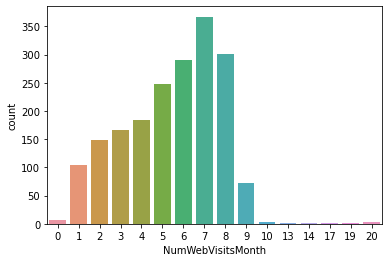

Countplot for column: Complain


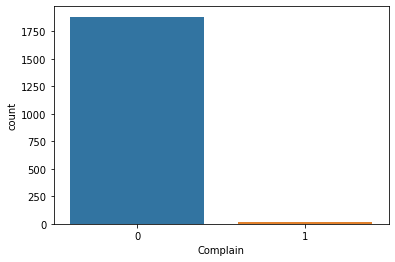

Countplot for column: Response


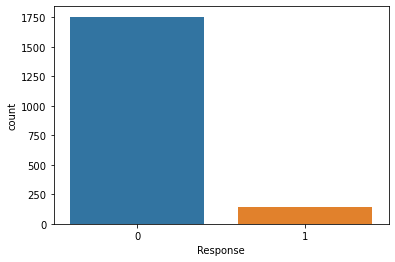

Countplot for column: Education_2n Cycle


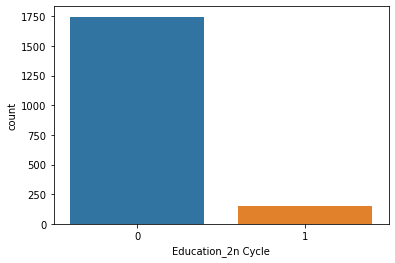

Countplot for column: Education_Basic


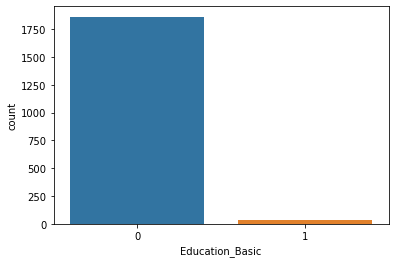

Countplot for column: Education_Graduation


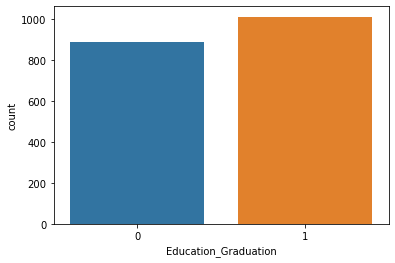

Countplot for column: Education_Master


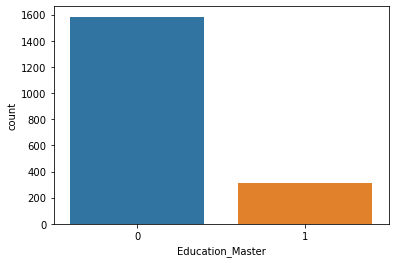

Countplot for column: Education_PhD


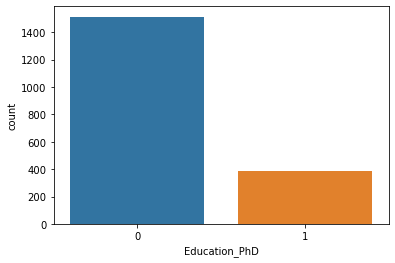

Countplot for column: Marital_Status_Divorced


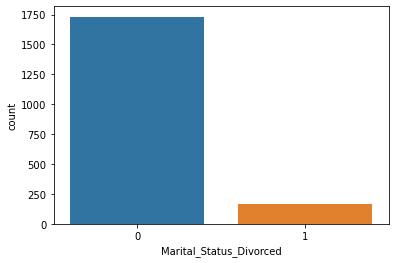

Countplot for column: Marital_Status_Married


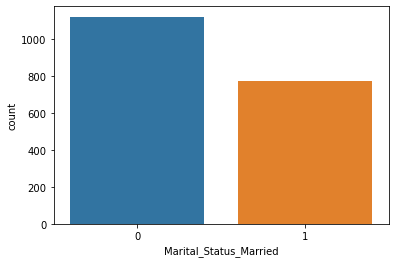

Countplot for column: Marital_Status_Single


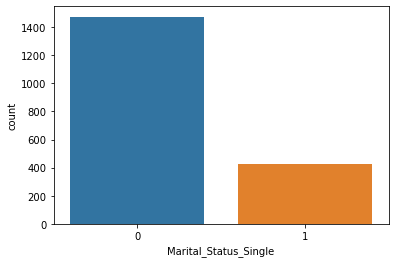

Countplot for column: Marital_Status_Together


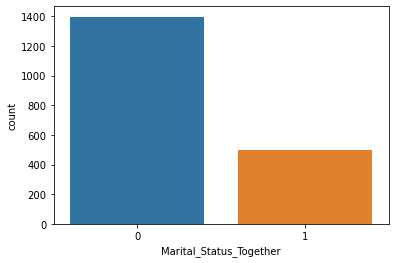

Countplot for column: Marital_Status_Widow


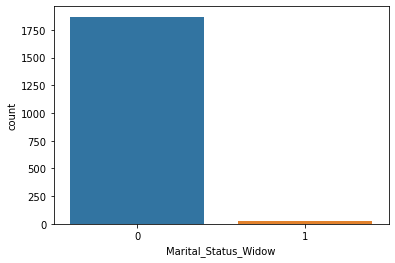

Countplot for column: AcceptedCmp


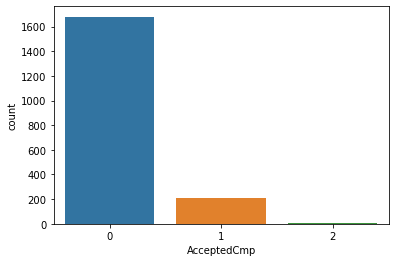

Countplot for column: Childrenhome


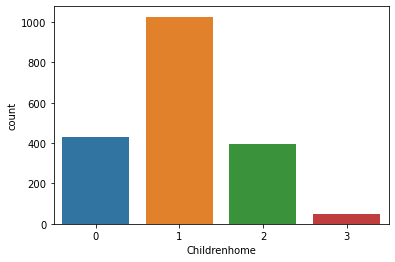

Countplot for column: Age


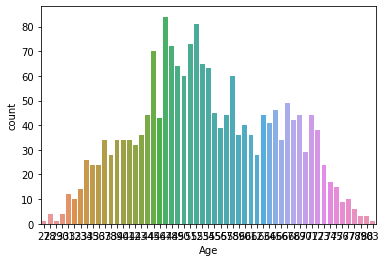

Countplot for column: clusterid


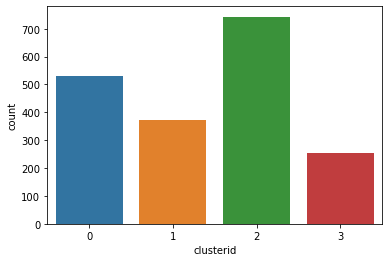

In [111]:
for i in cat_column:
    print(f"Countplot for column: {i}")
    sns.countplot(x=i, data=cust)
    plt.show()